In [1]:
#Task 1
from keras.models import Input, Model
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
import util_mnist_reader
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.stats import mode

#Loading data
x_train, y_train = util_mnist_reader.load_mnist('data/fashion', kind='train')
x_test, y_test = util_mnist_reader.load_mnist('data/fashion', kind='t10k')
#Normalizing data
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
scaler.fit(x_test)
x_test = scaler.transform(x_test)
#Applying kmeans and specifying number of clusters
kmeans = KMeans(n_clusters=np.max(y_train)+1)
kmeans.fit(x_train)
y_kmeans = kmeans.predict(x_test)
#Calculating Accuracy
print("Clustering Accuracy=")
labels=np.zeros_like(y_kmeans)
for i in range(10):
    mask=(y_kmeans==i)
    labels[mask]=mode(y_test[mask])[0]
print(metrics.accuracy_score(y_test,labels)*100)
#print(metrics.completeness_score(y_test, y_kmeans)*100)   





Using TensorFlow backend.


Clustering Accuracy=
55.779999999999994


Train on 60000 samples, validate on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 108us/step - loss: 0.4625 - accuracy: 0.4719 - val_loss: 0.3842 - val_accuracy: 0.4951
Epoch 2/50
60000/60000 [==============================] - 6s 103us/step - loss: 0.3768 - accuracy: 0.4920 - val_loss: 0.3553 - val_accuracy: 0.4972
Epoch 3/50
60000/60000 [==============================] - 6s 103us/step - loss: 0.3531 - accuracy: 0.4971 - val_loss: 0.3592 - val_accuracy: 0.4910
Epoch 4/50
60000/60000 [==============================] - 6s 102us/step - loss: 0.3443 - accuracy: 0.4983 - val_loss: 0.3357 - val_accuracy: 0.5042
Epoch 5/50
60000/60000 [==============================] - 6s 101us/step - loss: 0.3367 - accuracy: 0.4999 - val_loss: 0.3278 - val_accuracy: 0.5037
Epoch 6/50
60000/60000 [==============================] - 6s 102us/step - loss: 0.3315 - accuracy: 0.5010 - val_loss: 0.3247 - val_accuracy: 0.5037
Epoch 7/50
60000/60000 [==============================] - 6s 1

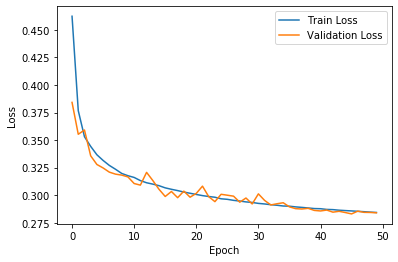

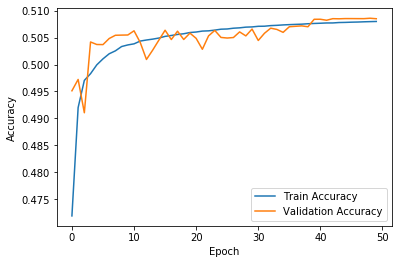

In [2]:
#task2
from keras.models import Input, Model
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
import scipy
import util_mnist_reader
from keras import backend as K
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from scipy.stats import mode
#Loading data
x_train, y_train = util_mnist_reader.load_mnist('data/fashion', kind='train')
x_test, y_test = util_mnist_reader.load_mnist('data/fashion', kind='t10k')
#Normalizing data
x_train = np.array(x_train)
x_test = np.array(x_test)
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0

#Encoding and decoding data
input_image = Input(shape=(784,))
encoded = Dense(256, activation="relu")(input_image)
encoded = Dense(128, activation="relu")(encoded)
decoded = Dense(256, activation="relu")(encoded)
output_image = Dense(784, activation="sigmoid")(decoded)

#Using autoencoder
autoencoder = Model(input_image, output_image)

autoencoder.compile(optimizer="rmsprop", loss="binary_crossentropy",metrics=["accuracy"])
history = autoencoder.fit(x_train, x_train, 
                          epochs=50, 
                          batch_size=2056, 
                          shuffle=True,
                          validation_data=(x_train, x_train))

restored_dataset = autoencoder.predict(x_test)

encoder = K.function([autoencoder.layers[0].input], [autoencoder.layers[4].output])
# Encode the training set
encoded_images = encoder([x_test])[0].reshape(-1,784)
# Cluster the training set using kmeans so specify number of clusters
kmeans = KMeans(n_clusters=10)
cluster_set = kmeans.fit_predict(encoded_images)

#Clustering Accuracy
print("Accuracy=")
labels=np.zeros_like(cluster_set)
for i in range(10):
    mask=(cluster_set==i)
    labels[mask]=mode(y_test[mask])[0]
print(metrics.accuracy_score(y_test,labels)*100)

#print(metrics.completeness_score(y_test, cluster_set)*100)

#Confusion Matrix
print("Confusion Matrix")
cm = confusion_matrix(y_test, cluster_set)
print(cm)


#Plotting Training Loss to Validation Loss
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#Plot Training Accuracy to Validation Accuracy
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 82us/step - loss: 0.6559 - accuracy: 0.4336 - val_loss: 0.5397 - val_accuracy: 0.4845
Epoch 2/50
60000/60000 [==============================] - 5s 75us/step - loss: 0.4783 - accuracy: 0.4894 - val_loss: 0.4324 - val_accuracy: 0.4891
Epoch 3/50
60000/60000 [==============================] - 4s 75us/step - loss: 0.4116 - accuracy: 0.4937 - val_loss: 0.3955 - val_accuracy: 0.4930
Epoch 4/50
60000/60000 [==============================] - 5s 75us/step - loss: 0.3842 - accuracy: 0.4960 - val_loss: 0.3757 - val_accuracy: 0.4938
Epoch 5/50
60000/60000 [==============================] - 5s 76us/step - loss: 0.3667 - accuracy: 0.4975 - val_loss: 0.3589 - val_accuracy: 0.4964
Epoch 6/50
60000/60000 [==============================] - 5s 75us/step - loss: 0.3526 - accuracy: 0.4988 - val_loss: 0.3504 - val_accuracy: 0.4990
Epoch 7/50
60000/60000 [==============================] - 5s 75us/st

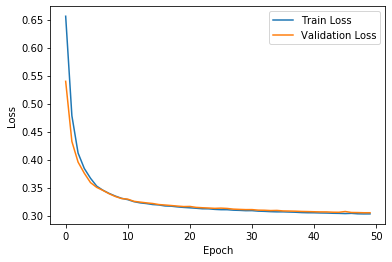

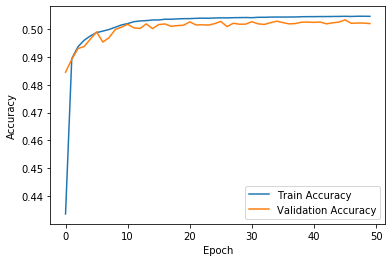

In [3]:
#Task 3
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
from sklearn import mixture
from keras.datasets import mnist
import numpy as np
from keras.callbacks import TensorBoard
from sklearn import metrics
import util_mnist_reader
from scipy.stats import mode
#First encoding then decoding data to reduce dimensionality
encoding_dimension = 6
input_image = Input(shape=(784,))
d= Dense(256, activation = 'relu')(input_image)
d= Dense(128,activation='relu')(d)

encoded = Dense(encoding_dimension, activation='relu',kernel_regularizer = regularizers.l2(0.01))(d)
d=Dense(128,activation='relu')(encoded)
d=Dense(256,activation='relu')(d)
decoded=Dense(784,activation='sigmoid')(d)
autoencoder=Model(input_image,decoded)

encoder = Model(input_image, encoded)
encoded_input = Input(shape=(encoding_dimension,))

deco = autoencoder.layers[-3](encoded_input)
deco = autoencoder.layers[-2](deco)
deco = autoencoder.layers[-1](deco)

decoder=Model(encoded_input,deco)
#Autoencoder
autoencoder.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])

#Loading data
x_train, y_train = util_mnist_reader.load_mnist('data/fashion', kind='train')
x_test, y_test = util_mnist_reader.load_mnist('data/fashion', kind='t10k')
#Normalizing data
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0
x_train = x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))

history=autoencoder.fit(x_train, x_train,
               epochs=50,
               batch_size=2056,
               shuffle=True,
               validation_data=(x_test,x_test))
#Using GaussianMixtureModel for clustering
encoded_image=encoder.predict(x_test)
clf = mixture.GaussianMixture(n_components=10)
clf.fit(encoded_image)


cluster_set=clf.fit_predict(encoded_image)
print("Accuracy=")
#print(metrics.completeness_score(y_test, cluster_set)*100)
for i in range(10):
    mask=(cluster_set==i)
    labels[mask]=mode(y_test[mask])[0]
print(metrics.accuracy_score(y_test,labels)*100)


# Confusion Matrix
print("Confusion Matrix=")
cm = confusion_matrix(y_test, cluster_set)
print(cm)

#plot Training loss vs validation loss
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#Plot Training Accuracy vs Validation Accuracy
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


